In [2]:
print("hello")

hello


Trial 30 Complete [00h 00m 03s]
val_loss: 2.3168014685312905

Best val_loss So Far: 0.25000418722629547
Total elapsed time: 00h 01m 54s
INFO:tensorflow:Oracle triggered exit
Best hyperparameters:
{'space': [{'class_name': 'Float', 'config': {'name': 'dropout_rate', 'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}, {'class_name': 'Choice', 'config': {'name': 'optimizer', 'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}}, {'class_name': 'Int', 'config': {'name': 'batch_size', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Float', 'config': {'name': 'beta1', 'default': 0.5, 'conditions': [], 'min_value': 0.5, 'max_value': 0.999, 'step': 0.1, 'sampling': 'linear'}}, {'class_name': '

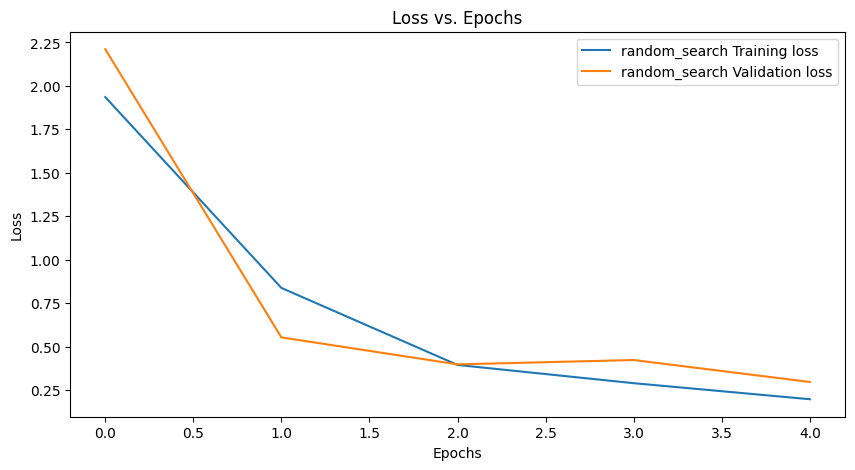

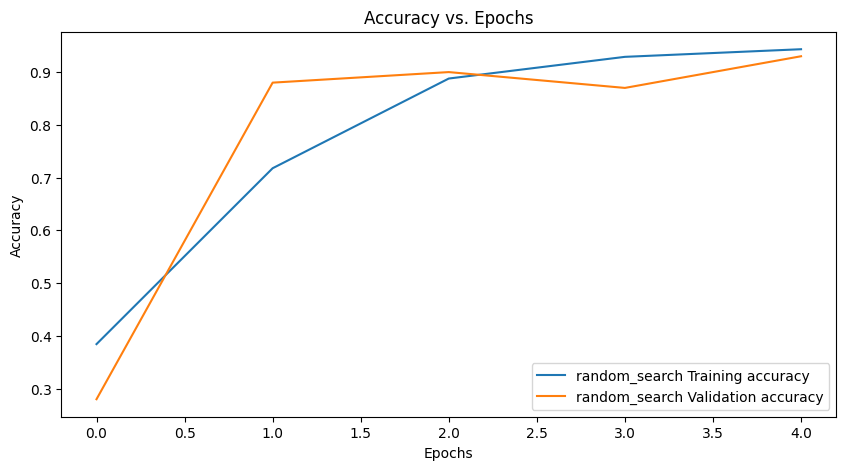

In [1]:
from myMain import DataLoader, MyHyperModel, NelderMeadHyperModel, TunerWrapper, PlotResults

if __name__ == "__main__":
    data_loader = DataLoader(n=1000)
    x_train, y_train, x_test, y_test = data_loader.load_data()

    # algorithms = ["grid_search", "random_search", "nelder_mead"]
    algorithms = ["nelder_mead"]

    results = {}

    for algorithm in algorithms:
        print(f"Running {algorithm}...")

        if algorithm == "nelder_mead":
            hypermodel = NelderMeadHyperModel(num_classes=10)
        else:
            hypermodel = MyHyperModel(num_classes=10)

        tuner_wrapper = TunerWrapper(x_train, y_train, x_test, y_test)

        if algorithm == "grid_search":
            best_model, history = tuner_wrapper.grid_search(hypermodel, "trail#1_1000/grid", "trail1000")
        elif algorithm == "random_search":
            best_model, history = tuner_wrapper.random_search(hypermodel, "trail#1_1000", "random")
        elif algorithm == "nelder_mead":
            best_model, history = tuner_wrapper.nelder_mead_search(hypermodel)

        results[algorithm] = history.history

    # Plot the results
    myplot = PlotResults(results)
    myplot.plot_loss()
    myplot.plot_accuracy()